In [9]:
#dbscanMagnitude

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sys
import sompy
from time import time
from sompy.visualization.bmuhits import BmuHitsView
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

In [10]:
dFrame = pd.read_csv('somDatasetLLD.csv')
quakeRecArr  = dFrame.to_records(index=False)
quakeLLD  = np.array(quakeRecArr.tolist()) #either a dont delete it or adaptfurther down.

In [11]:
quakeLLD

array([[172.16794, -43.52731,  11.0426 ],
       [172.32367, -43.55426,  10.0257 ],
       [172.38512, -43.6585 ,   7.8273 ],
       [172.29477, -43.5661 ,  11.8823 ],
       [172.18575, -43.4711 ,   6.2919 ],
       [172.11847, -43.49201,  10.1591 ],
       [172.11028, -43.62283,  17.6058 ],
       [172.21217, -43.59541,  14.2405 ],
       [172.4296 , -43.68362,   8.317  ],
       [172.54439, -43.58787,  24.8006 ],
       [172.30362, -43.58586,   9.8851 ],
       [172.37521, -43.66354,   5.     ],
       [172.23647, -43.64153,  11.2593 ],
       [172.27835, -43.63268,   8.1763 ],
       [172.41315, -43.60732,   9.3622 ],
       [172.16673, -43.60926,   9.4878 ],
       [172.27443, -43.61766,  12.7419 ],
       [172.40707, -43.64999,  11.324  ],
       [172.16286, -43.46124,   6.6817 ],
       [172.40086, -43.60709,  18.6778 ],
       [172.17003, -43.47633,   7.1462 ],
       [172.23813, -43.57198,   5.     ],
       [171.90025, -43.64566,   5.     ],
       [172.35774, -43.6156 ,  13.

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


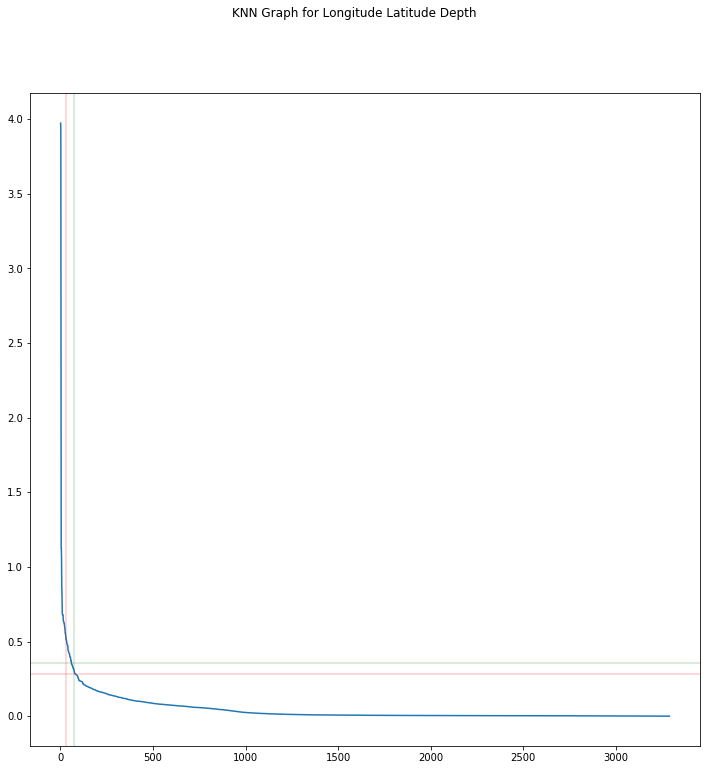

In [12]:
from sklearn.neighbors import NearestNeighbors

ns = 4
nbrs = NearestNeighbors(n_neighbors=ns).fit(quakeLLD)
distances, indices = nbrs.kneighbors(quakeLLD)
distanceDec = sorted(distances[:,ns-1], reverse=True)

figure = plt.figure()
plt.plot(list(range(1,3291)), distanceDec)
figure.set_size_inches(12,12)

plt.suptitle('KNN Graph for Longitude Latitude Depth')

plt.axvline(x=71, color = 'green', alpha=0.2, markersize=2)
plt.axhline(y=0.36, color = 'green', alpha=0.2, markersize=2)

plt.axvline(x=30, color = 'red', alpha=0.2, markersize=2)
plt.axhline(y=0.28, color = 'red', alpha=0.2, markersize=2)

In [13]:
clustering = DBSCAN(eps=1.1, min_samples=1).fit(quakeLLD)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
clustering = DBSCAN(eps=1.1, min_samples=1).fit(quakeLLD)

In [17]:
import time
start = time.time()
clustering = DBSCAN(eps=1.1, min_samples=1).fit(quakeLLD)
end = time.time()
print(end - start)

0.2648351192474365


In [7]:
print("cluster labels range from: " + str(min(clustering.labels_)) + " " + str(max(clustering.labels_)))

cluster labels range from: 0 3


In [8]:
DBSCANDepth4ClustLLD = np.column_stack((quakeLLD, clustering.labels_))
DBSCANDepth4ClustLLD

array([[172.16794, -43.52731,  11.0426 ,   0.     ],
       [172.32367, -43.55426,  10.0257 ,   0.     ],
       [172.38512, -43.6585 ,   7.8273 ,   0.     ],
       [172.29477, -43.5661 ,  11.8823 ,   0.     ],
       [172.18575, -43.4711 ,   6.2919 ,   0.     ],
       [172.11847, -43.49201,  10.1591 ,   0.     ],
       [172.11028, -43.62283,  17.6058 ,   0.     ],
       [172.21217, -43.59541,  14.2405 ,   0.     ],
       [172.4296 , -43.68362,   8.317  ,   0.     ],
       [172.54439, -43.58787,  24.8006 ,   0.     ],
       [172.30362, -43.58586,   9.8851 ,   0.     ],
       [172.37521, -43.66354,   5.     ,   0.     ],
       [172.23647, -43.64153,  11.2593 ,   0.     ],
       [172.27835, -43.63268,   8.1763 ,   0.     ],
       [172.41315, -43.60732,   9.3622 ,   0.     ],
       [172.16673, -43.60926,   9.4878 ,   0.     ],
       [172.27443, -43.61766,  12.7419 ,   0.     ],
       [172.40707, -43.64999,  11.324  ,   0.     ],
       [172.16286, -43.46124,   6.6817 ,   0. 

In [114]:
np.savetxt("DBSCAN4ClusteredLLDNoNoise.csv", DBSCANDepth4ClustLLD , fmt='%.20f' , delimiter=",")